In [72]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [73]:
adult_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours",
    "native",
    "class"
]
df = pd.read_csv("adult.data", names=adult_names)


In [74]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [75]:
encoder = LabelEncoder()

for col in adult_names:
    if df[col].dtype == "object":
        df[col] = encoder.fit_transform(df[col])

In [76]:
scaler = MinMaxScaler()
adult = scaler.fit_transform(df)


In [77]:
X_adult, y_adult = adult[:, :-1], adult[:, -1]
print(X_adult.shape, y_adult.shape)


(32561, 14) (32561,)


In [78]:
x_train_adult, x_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, train_size=0.8)


In [79]:
x_train_adult.shape, x_test_adult.shape, y_train_adult.shape, y_test_adult.shape

((26048, 14), (6513, 14), (26048,), (6513,))

### Model

In [80]:
ad_mse = Sequential([
    Dense(units=10, input_dim= X_adult.shape[1], activation="relu"),
    Dense(units=24,activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=8,activation="relu"),
    Dense(units=1, activation="sigmoid")
])
ad_mse.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                150       
                                                                 
 dense_33 (Dense)            (None, 24)                264       
                                                                 
 dense_34 (Dense)            (None, 16)                400       
                                                                 
 dense_35 (Dense)            (None, 8)                 136       
                                                                 
 dense_36 (Dense)            (None, 1)                 9         
                                                                 
Total params: 959
Trainable params: 959
Non-trainable params: 0
_________________________________________________________________


In [81]:
ad_mse.compile(optimizer="adam", loss="mse", metrics=["accuracy"])


In [82]:
history_ad_mse = ad_mse.fit(x_train_adult, y_train_adult, epochs=10, validation_split=0.2, verbose=0)

In [83]:
import matplotlib.pyplot as plt

In [84]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

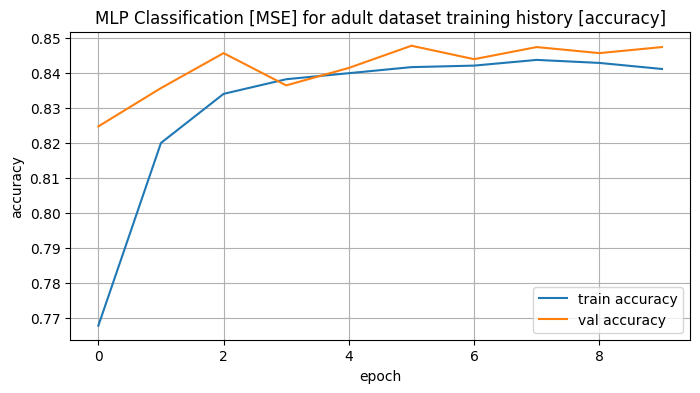

In [85]:
plot_history(history=history_ad_mse, metrics=["accuracy"],model_name="MLP Classification [MSE] for adult dataset")

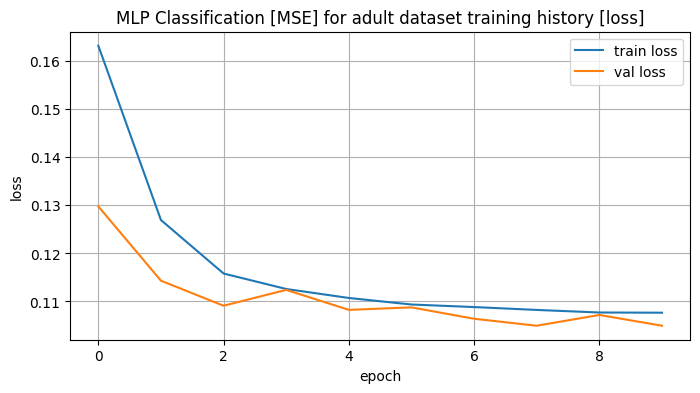

In [86]:
plot_history(history=history_ad_mse, metrics=["loss"], model_name="MLP Classification [MSE] for adult dataset")

In [87]:
result_ad_mse = ad_mse.evaluate(x_test_adult, y_test_adult)

204/204 [==============================] - 0s 757us/step - loss: 0.1061 - accuracy: 0.8448


Classification - CCE loss function 

In [88]:
ad_cce = Sequential([
    Dense(units=32, input_dim= X_adult.shape[1], activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=8, activation="relu"),
    Dense(units=2, activation="softmax")
])
ad_cce.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 32)                480       
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dense_40 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,162
Trainable params: 1,162
Non-trainable params: 0
_________________________________________________________________


In [89]:
ad_cce.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [90]:
history_ad_cce = ad_cce.fit(x_train_adult, y_train_adult, epochs=10, verbose=0, validation_split=0.2)

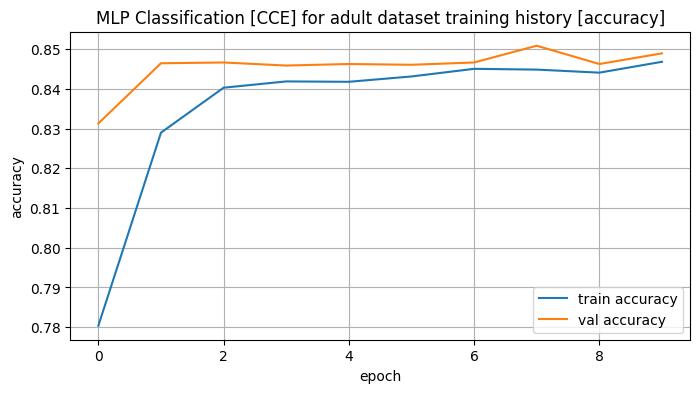

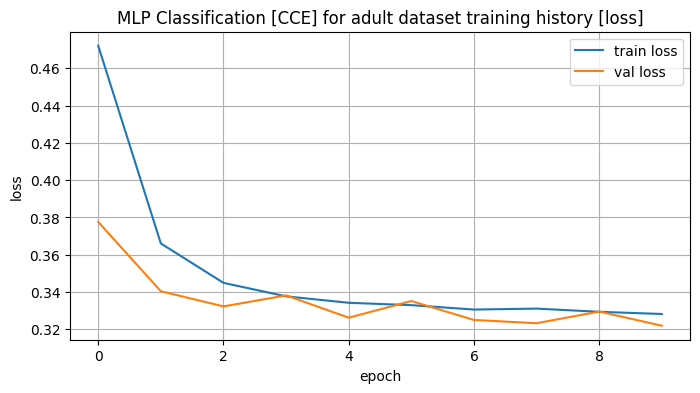

In [91]:
plot_history(history_ad_cce, metrics=["accuracy"], model_name="MLP Classification [CCE] for adult dataset")
plot_history(history_ad_cce, metrics=["loss"],model_name="MLP Classification [CCE] for adult dataset")

In [92]:
result_ad_cce = ad_cce.evaluate(x_test_adult, y_test_adult)

204/204 [==============================] - 0s 980us/step - loss: 0.3252 - accuracy: 0.8460
